### 1. Import important libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2. Import Data set

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv',sep=',')

### 3. Data Frame

#### a). Displaying top 5 row's of data frame

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### b). Data frame shape

In [4]:
df.shape

(200, 5)

#### c). Data frame info 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


##### Outcome :
* There are total 5 columns in the data frame.
* 'Unnamed' is an int type of column. As i observed it is an unique no. So it is not for my used to create model, i can drop it.
* 'TV','radio','newspaper' & 'sales' all are float data type.
* There is no null value in the data frame.
* As per problem statement 'sales' is our target variable.

#### d).Cross checking the null value

In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

##### Outcome : There is no null value in the data frame.

#### e). Checking unique value for each

In [7]:
df['Unnamed: 0'].is_unique

True

In [8]:
df['TV'].is_unique

False

In [9]:
df['radio'].is_unique

False

In [10]:
df['newspaper'].is_unique

False

In [11]:
df['sales'].is_unique

False

##### Outcome : As observed except 'Unnamed: 0' rest all are not contain unique value. So 'Unnamed: 0' is not use for my model. So i can drop it. 

#### f). Dropping 'Unnamed: 0' column from data frame

In [12]:
df = df.drop(columns='Unnamed: 0')

In [13]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


##### Outcome : As we have to predict the 'sales' so problem is look like regression problem.

### 4. Correlation matrix to see the coffecient of multicolinearity

#### a). Correlation matrix in form of Data Frame

In [14]:
df_corr = df.corr().abs()
df_corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


#### b). Visualize Correlation matrix using heatmap

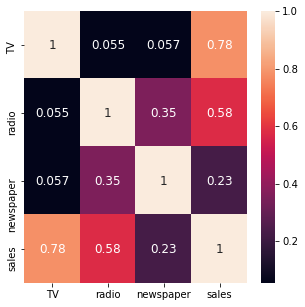

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.show()

##### Outcome :
* All features have positive correlation with respect to target variable
* 'TV' has 78 percentage correlation with target variable which can be considered as strong bond.
* 'radio' has 58 percentage correlation with target variable which can be considered as strong bond.
* 'newspaper' has 23 percentage correlation with target variable which can be considered as less bond.

### 5. Visualize the data distribution

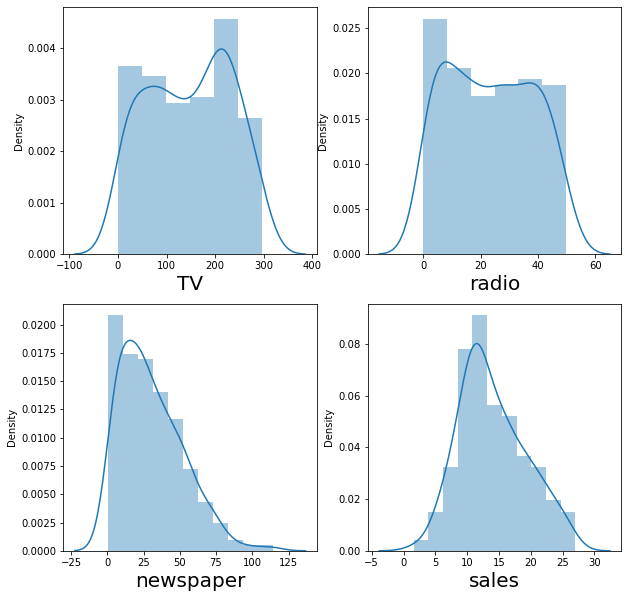

In [16]:
plt.figure(figsize=(10,10))
plot_number = 1
for column in df:
    if plot_number<=4:
        ax = plt.subplot(2,2,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plot_number+=1
plt.show()    

### 6. Separating the features and lable

In [17]:
X = df.drop(columns='sales')
y = df['sales']

In [18]:
X.shape

(200, 3)

In [19]:
y.shape

(200,)

### 7. Visualize Data distribution with respect to target variable

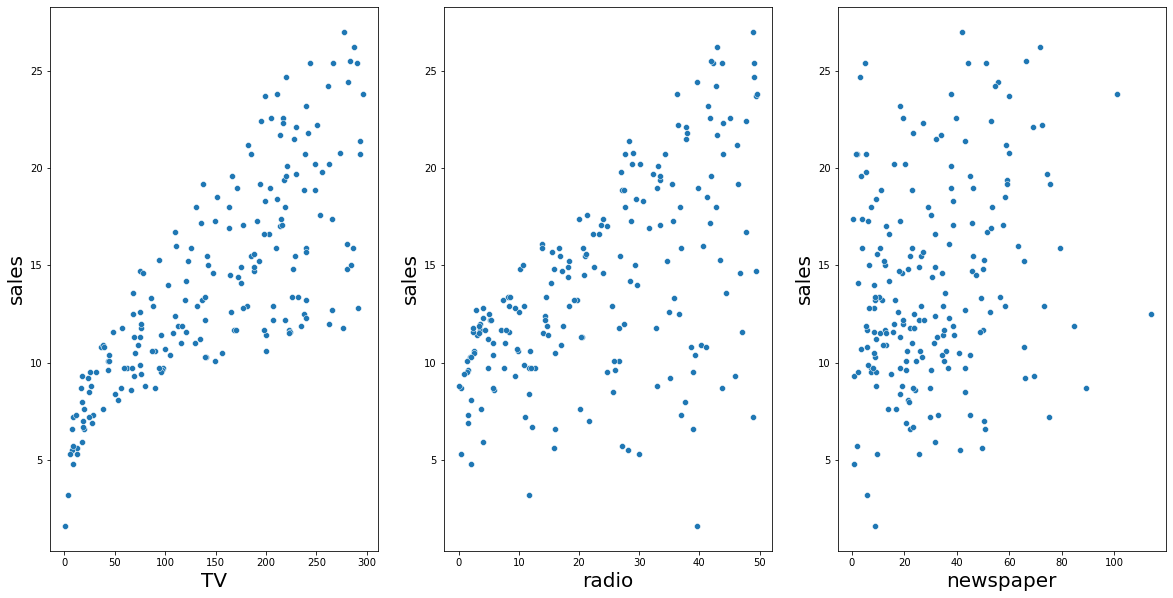

In [20]:
plt.figure(figsize=(20,10))
lot = 1
for col in X:
    if lot<=3:
        ax = plt.subplot(1,3,lot)
        sns.scatterplot(x=X[col],y=y)
        plt.xlabel(col,fontsize = 20)
        plt.ylabel('sales',fontsize = 20)
    lot+=1
plt.show()   

##### Outcome :
* From above fig as i observed if company invest on 'TV' and 'radio' advertisment the sale will increase but if comapny invest on 'newspaper' advertisment then it will not have much impact. 

##### Decision :
* I am going to observe both condition with & without 'newspaper'

### 8. a) Part - 1 When i am included 'newspaper'

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

#### (i). Initiate our model

In [22]:
lr = LinearRegression()

#### (ii) Spilt data set using train test split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=355)

In [25]:
print('The shape of X-train dataset is :',X_train.shape)
print('The shape of X-test dataset is :',X_test.shape)
print('The shape of y-train dataset is :',y_train.shape)
print('The shape of y-test dataset is :',y_test.shape)

The shape of X-train dataset is : (160, 3)
The shape of X-test dataset is : (40, 3)
The shape of y-train dataset is : (160,)
The shape of y-test dataset is : (40,)


#### (iii) Fit the model

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

#### (iv) Displaying the score for training data set 

In [27]:
print('The score of linear regrression on training data set is :',lr.score(X_train,y_train))

The score of linear regrression on training data set is : 0.8925625247247966


#### (v) Displaying the score for testing data set

In [28]:
print('The score of linear regrression on testing data set is :',lr.score(X_test,y_test))

The score of linear regrression on testing data set is : 0.9129791003854311


#### (vi) Predict the value on test set

In [29]:
y_pred = lr.predict(X_test)
y_pred

array([ 6.66475168, 12.68996813, 19.18789019, 10.73767138,  8.51128771,
       21.85839533, 16.46070696, 13.95650458,  7.99961504, 14.98520643,
       11.49432159, 21.59939662, 12.0335902 , 11.98137772, 12.4562088 ,
       13.86548952,  7.21802104, 10.50800853, 19.97045525, 17.03430336,
       17.30878578, 14.75037064, 16.54181955, 12.41663054, 15.68419744,
       16.97507074,  7.90927771, 10.08743223, 24.71613038, 17.61306495,
       22.86769655, 21.07774994, 18.78023118, 10.71171783, 14.68454314,
       10.01495745,  8.87611124,  8.02675632,  6.67144752, 21.64468566])

#### (vii) Visualize the actual v/s predicted sales

<function matplotlib.pyplot.show(close=None, block=None)>

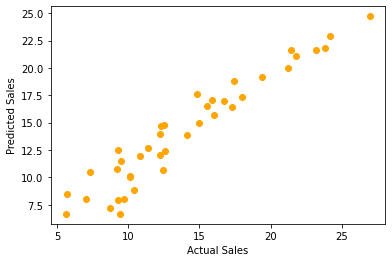

In [30]:
plt.scatter(y_test,y_pred,c = 'orange')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show

### b) Part - 2 When i am not included 'newspaper'

In [31]:
X_wn = df.drop(columns=['sales','newspaper'])
y_wn = df['sales']

In [32]:
X_wn.shape

(200, 2)

In [33]:
y_wn.shape

(200,)

#### (i). Initiate our model

In [34]:
lr_wn = LinearRegression()

#### (ii) Spilt data set using train test split

In [35]:
X_wn_train, X_wn_test, y_wn_train, y_wn_test = train_test_split(X_wn, y_wn, test_size=0.20, random_state=355)

#### (iii) Fit the model

In [36]:
lr_wn.fit(X_wn_train,y_wn_train)

LinearRegression()

#### (iv) Displaying the score for training data set 

In [37]:
print('The score of linear regrression on training data set is :',lr_wn.score(X_wn_train,y_wn_train))

The score of linear regrression on training data set is : 0.8925489723914413


#### (v) Displaying the score for testing data set

In [38]:
print('The score of linear regrression on testing data set is :',lr_wn.score(X_wn_test,y_wn_test))

The score of linear regrression on testing data set is : 0.9132413391971931


#### (vi) Predict the value on test set

In [39]:
y_we_pred = lr_wn.predict(X_wn_test)
y_we_pred

array([ 6.64086847, 12.67771639, 19.16796664, 10.70811562,  8.53597787,
       21.86531996, 16.48874189, 13.95229926,  7.97783518, 15.00412008,
       11.51832377, 21.59305047, 12.0335283 , 11.95401064, 12.42846659,
       13.88789964,  7.21256808, 10.49794677, 19.95601468, 17.03995427,
       17.33639438, 14.74998442, 16.54430191, 12.42241691, 15.66151167,
       16.96651496,  7.92795619, 10.0826927 , 24.72037334, 17.61783873,
       22.85692601, 21.09313543, 18.80860496, 10.70546614, 14.67150067,
       10.01000411,  8.86325676,  8.00795952,  6.67360602, 21.66596493])

#### (vii) Visualize the actual v/s predicted sales

<function matplotlib.pyplot.show(close=None, block=None)>

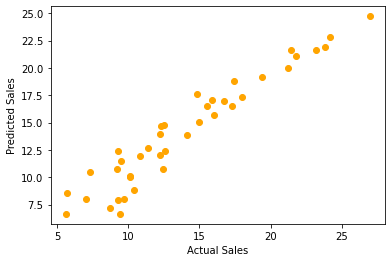

In [40]:
plt.scatter(y_wn_test,y_we_pred,c = 'orange')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show

### 9. Predict the sales given features using this model

In [41]:
df.tail(2)

,TV,radio,newspaper,sales
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


#### a). Model that includes all features

In [42]:
lr.predict([[283.6,42.0,66.2]])

array([23.75457009])

In [43]:
lr.predict([[232.1,8.6,8.7]])

array([15.15005287])

#### b). Model that not include 'newspaper'

In [44]:
lr_wn.predict([[283.6,42.0]])

array([23.7334378])

In [45]:
lr_wn.predict([[232.1,8.6]])

array([15.16471128])

##### Outcome : These both model predict result above 90 %

### 10. Score Comparision

In [46]:
score = pd.DataFrame({})
score['Training_set_Score_with_newspaper'] = [lr.score(X_train,y_train)]
score['Training_set_Score_without_newspaper'] = [lr_wn.score(X_wn_train,y_wn_train)]
score['Testing_set_Score_with_newspaper'] = [lr.score(X_test,y_test)]
score['Testing_set_Score_without_newspaper'] = [lr_wn.score(X_wn_test,y_wn_test)]

In [47]:
score

,Training_set_Score_with_newspaper,Training_set_Score_without_newspaper,Testing_set_Score_with_newspaper,Testing_set_Score_without_newspaper
0,0.892563,0.892549,0.912979,0.913241


##### Outcome : 
* With & without 'newspaper' score almost same. So my suggestion not to invest on advertising by newspaper.
* I can drop it.
* Now i am considering the model without 'newspaper' for further.

### 11. Model Evaluation

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [49]:
y_we_pred = lr_wn.predict(X_wn_test)

In [50]:
mean_absolute_error(y_wn_test, y_we_pred)

1.3161931928374961

In [51]:
mean_squared_error(y_wn_test, y_we_pred)

2.543408224229008

In [52]:
np.sqrt(mean_squared_error(y_wn_test, y_we_pred))

1.5948066416431204

##### Successfully completed building the Model

### 12. Checking whether model is overfitted 

In [53]:
from sklearn.linear_model import Lasso, LassoCV

In [54]:
lCV = LassoCV(alphas=None,max_iter=100,normalize=True)
lCV.fit(X_wn_train,y_wn_train)

LassoCV(max_iter=100, normalize=True)

In [55]:
alpha = lCV.alpha_
alpha

0.00031917845731458706

In [56]:
lesso_reg = Lasso(alpha)
lesso_reg.fit(X_wn_train,y_wn_train)

Lasso(alpha=0.00031917845731458706)

In [57]:
lesso_reg.score(X_wn_test,y_wn_test)

0.9132411662805637

##### Outcome : As i observed my model is not overfitted.

### 13. Saving the model

In [58]:
import pickle

In [60]:
final_result = 'Advertising Sales Channel Prediction.pickle'
pickle.dump(lr_wn,open(final_result,'wb'))